In [1]:
import h5py
import yt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ds=yt.load("Data/Cholla/30.h5")

In [3]:
f1 = h5py.File("/Users/yilinxia/Desktop/DXL/yt/Cholla/30.h5",'r') 

In [4]:
type(f1)

h5py._hl.files.File

# Exploration
### Keys Explorations

In [5]:
f1.keys()

<KeysViewHDF5 ['Energy', 'GasEnergy', 'density', 'momentum_x', 'momentum_y', 'momentum_z']>

In [6]:
f1["density"]

<HDF5 dataset "density": shape (128, 128, 128), type ">f8">

In [7]:
f1['Energy']

<HDF5 dataset "Energy": shape (128, 128, 128), type ">f8">

In [8]:
f1['GasEnergy']

<HDF5 dataset "GasEnergy": shape (128, 128, 128), type ">f8">

In [9]:
f1['momentum_x']

<HDF5 dataset "momentum_x": shape (128, 128, 128), type ">f8">

In [10]:
f1['momentum_y']

<HDF5 dataset "momentum_y": shape (128, 128, 128), type ">f8">

In [11]:
f1['momentum_z']

<HDF5 dataset "momentum_z": shape (128, 128, 128), type ">f8">

In [12]:
# np.array(f1['momentum_z'])

### Attributes Exploration

In [13]:
f1.attrs.keys()

<KeysViewHDF5 ['bounds', 'dims', 'dims_local', 'domain', 'dt', 'dx', 'gamma', 'n_step', 'offset', 't']>

In [14]:
dims=f1.attrs["dims"]

In [15]:
dims

array([128, 128, 128], dtype=int32)

In [16]:
f1.attrs["bounds"]

array([-5., -5., -5.])

In [17]:
f1.attrs["dims_local"]

array([128, 128, 128], dtype=int32)

In [18]:
f1.attrs["domain"]

array([10., 10., 10.])

In [19]:
f1.attrs["dt"]

array([1.])

In [20]:
f1.attrs["dx"]

array([0.078125, 0.078125, 0.078125])

In [21]:
f1.attrs["gamma"]

array([1.6666667])

In [22]:
f1.attrs["n_step"]

array([25379], dtype=int32)

In [23]:
f1.attrs["offset"]

array([0, 0, 0], dtype=int32)

In [24]:
f1.attrs["t"]

array([30000.])

# Direct Visualization with Numpy

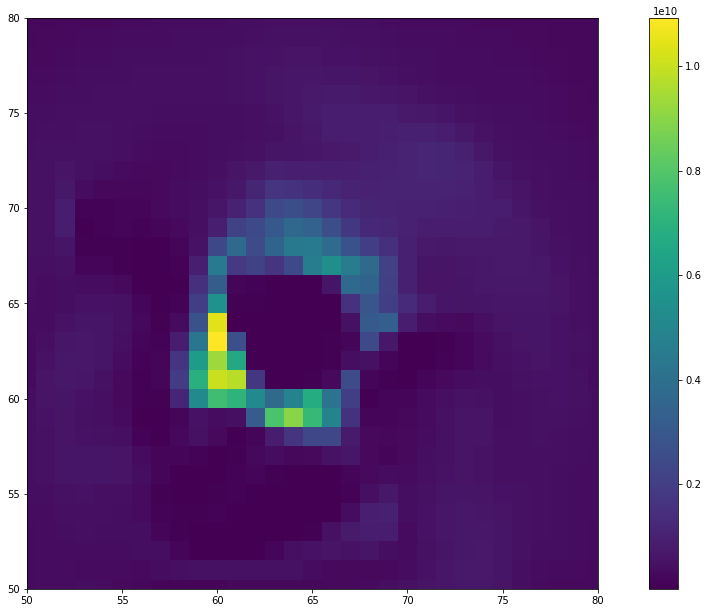

In [25]:
ds=np.array(f1["density"])
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(18.5, 10.5)
# m = ax.imshow(np.log(ds[:, :, ds.shape[2]//2]))
m = ax.imshow(ds[:, :, ds.shape[2]//2])
plt.xlim(50, 80)
plt.ylim(50, 80)
fig.colorbar(m, ax=ax, location='right')
plt.show()

# Visualization with yt

In [26]:
grid_data = [
    dict(left_edge = [0.0, 0.0, 0.0],
         right_edge = [1.0, 1.0, 1.0],
         level = 0,
         dimensions = list(f1.attrs["dims"]))]

In [27]:
for g in grid_data:
    g["density"]=np.array(f1["density"])

In [28]:
grid_data[0]["particle_position_x"] = (np.random.uniform(low=0.25, high=0.75, size=1000), "code_length")
grid_data[0]["particle_position_y"] = (np.random.uniform(low=0.25, high=0.75, size=1000), "code_length")
grid_data[0]["particle_position_z"] = (np.random.uniform(low=0.25, high=0.75, size=1000), "code_length")

In [29]:
ds = yt.load_amr_grids(grid_data, [128, 128, 128])

yt : [INFO     ] 2022-04-22 09:28:33,316 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-04-22 09:28:33,318 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-04-22 09:28:33,320 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-22 09:28:33,322 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-04-22 09:28:33,322 Parameters: cosmological_simulation   = 0


yt : [INFO     ] 2022-04-22 09:28:34,145 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-22 09:28:34,146 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-22 09:28:34,147 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-22 09:28:34,147 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-22 09:28:34,150 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



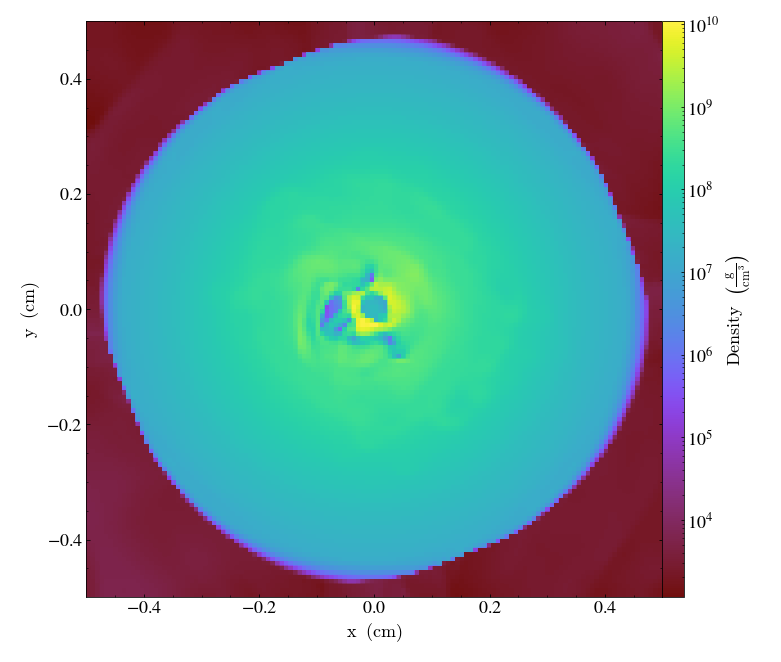

In [30]:
yt.SlicePlot(ds, "z", ("gas", "density"))